In [1]:
import pandas as pd

In [2]:
covid_data = pd.read_csv('data/covid_data.csv', sep = ',')

In [3]:
df = covid_data.copy()

In [4]:
df.head()

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [5]:
df.groupby(['country', 'date'])

In [6]:
df.head(
    
)

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [7]:
df = df.groupby(['country', 'date'], as_index=False).sum()
df.drop('province/state', axis=1)

,country,date,confirmed,deaths,recovered
0,Afghanistan,01/01/2021,51526.0,2191.0,41727.0
1,Afghanistan,01/02/2021,51526.0,2191.0,41727.0
2,Afghanistan,01/03/2021,51526.0,2191.0,41727.0
3,Afghanistan,01/04/2021,53011.0,2237.0,42530.0
4,Afghanistan,01/05/2021,53105.0,2244.0,42666.0
...,...,...,...,...,...
86780,occupied Palestinian territory,03/12/2020,0.0,0.0,0.0
86781,occupied Palestinian territory,03/14/2020,0.0,0.0,0.0
86782,occupied Palestinian territory,03/15/2020,0.0,0.0,0.0
86783,occupied Palestinian territory,03/16/2020,0.0,0.0,0.0


In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df['active'] = df['confirmed'] - df['recovered'] - df['deaths']

In [10]:
df = df.sort_values(by=['country', 'date'])

In [11]:
display(df)

,country,date,province/state,confirmed,deaths,recovered,active
54,Afghanistan,2020-02-24,0,1.0,0.0,0.0,1.0
56,Afghanistan,2020-02-25,0,1.0,0.0,0.0,1.0
58,Afghanistan,2020-02-26,0,1.0,0.0,0.0,1.0
60,Afghanistan,2020-02-27,0,1.0,0.0,0.0,1.0
62,Afghanistan,2020-02-28,0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
86780,occupied Palestinian territory,2020-03-12,0,0.0,0.0,0.0,0.0
86781,occupied Palestinian territory,2020-03-14,0,0.0,0.0,0.0,0.0
86782,occupied Palestinian territory,2020-03-15,0,0.0,0.0,0.0,0.0
86783,occupied Palestinian territory,2020-03-16,0,0.0,0.0,0.0,0.0


In [12]:
df['daily_confirmed'] = df.groupby('country')['confirmed'].diff()
df['daily_deaths'] = df.groupby('country')['deaths'].diff()
df['daily_recovered'] = df.groupby('country')['recovered'].diff()

In [13]:
df.head()

,country,date,province/state,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
54,Afghanistan,2020-02-24,0,1.0,0.0,0.0,1.0,NaN,NaN,NaN
56,Afghanistan,2020-02-25,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
58,Afghanistan,2020-02-26,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
60,Afghanistan,2020-02-27,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
62,Afghanistan,2020-02-28,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
vac_data = pd.read_csv('data/country_vaccinations.csv', sep = ',')

In [15]:
vac_data['date'] = pd.to_datetime(vac_data['date'])

In [16]:
df['date'].min()


Timestamp('2020-01-22 00:00:00')

In [17]:
str(vac_data['date'].min()) + '-' + str(vac_data['date'].max())

'2020-12-02 00:00:00-2021-09-06 00:00:00'

In [18]:
covid_df = df.merge(vac_data, how='left', on=['date', 'country'])

In [19]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86785 non-null  object        
 1   date                                 86785 non-null  datetime64[ns]
 2   province/state                       86785 non-null  object        
 3   confirmed                            86785 non-null  float64       
 4   deaths                               86785 non-null  float64       
 5   recovered                            86785 non-null  float64       
 6   active                               86785 non-null  float64       
 7   daily_confirmed                      86564 non-null  float64       
 8   daily_deaths                         86564 non-null  float64       
 9   daily_recovered                      86564 non-null  float64       
 10  iso_code  

In [20]:
covid_df.head()

,country,date,province/state,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,...,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,2020-02-24,0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2020-02-25,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2020-02-26,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2020-02-27,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2020-02-28,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2)

7.19

In [22]:
covid_df.groupby('country', as_index=False)
covid_df.groupby('country', as_index=False).mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
covid_df.groupby('country', as_index=False)
round(covid_df.groupby('country', as_index=False).mean(), 2)

In [ ]:
! pip install matplotlib

You should consider upgrading via the 'c:\phython3.9\python.exe -m pip install --upgrade pip' command.


Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='country'>

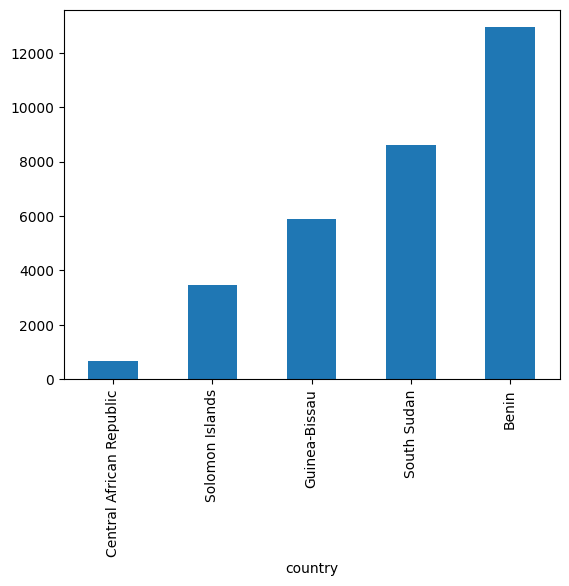

In [ ]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar')

In [ ]:
import matplotlib.pyplot as  plt

In [23]:
df.groupby('date')['daily_vaccinations']

KeyError: 'Column not found: daily_vaccinations'

In [25]:
display(covid_df)

,country,date,province/state,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,...,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,death_rate,recover_rate
0,Afghanistan,2020-02-24,0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,Afghanistan,2020-02-25,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,Afghanistan,2020-02-26,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,Afghanistan,2020-02-27,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,Afghanistan,2020-02-28,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,occupied Palestinian territory,2020-03-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,occupied Palestinian territory,2020-03-14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,occupied Palestinian territory,2020-03-15,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,occupied Palestinian territory,2020-03-16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
covid_df.groupby('date')['daily_vaccinations'].sum()

date
2020-01-22           0.0
2020-01-23           0.0
2020-01-24           0.0
2020-01-25           0.0
2020-01-26           0.0
                 ...    
2021-05-25    30044043.0
2021-05-26    31188013.0
2021-05-27    31397473.0
2021-05-28    31584424.0
2021-05-29    32236698.0
Name: daily_vaccinations, Length: 494, dtype: float64

In [31]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,country,date,province/state,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,Australia,2020-01-23,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,Australia,2020-01-25,0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,Australia,2020-01-26,0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,Australia,2020-01-27,New South WalesVictoria,5.0,0.0,0.0,5.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,Australia,2020-01-28,New South WalesVictoria,5.0,0.0,0.0,5.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


In [39]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100

In [32]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\phython3.9\python.exe -m pip install --upgrade pip' command.


In [33]:
import seaborn as sns

In [54]:
pivot_tb = croped_covid_df.pivot_table(values='confirmed_per_hundred', columns='date', index='country',)
pivot_tb.columns = pivot_tb.columns.astype('string')

In [52]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Тепловая карта заболеваемости')

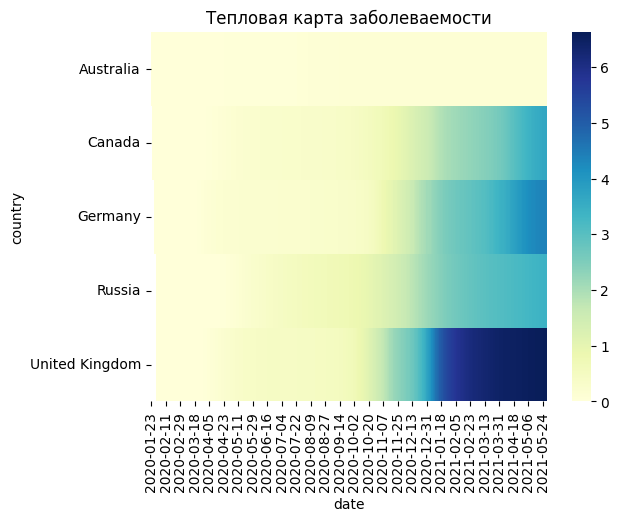

In [55]:
fig = plt.figure()
hmap  = sns.heatmap(
    data=pivot_tb,
    cmap='YlGnBu'
)
hmap.set_title('Тепловая карта заболеваемости')

In [56]:
croped_covid_df['recover_rate'] = croped_covid_df['recovered'] / croped_covid_df['confirmed_per_hundred']

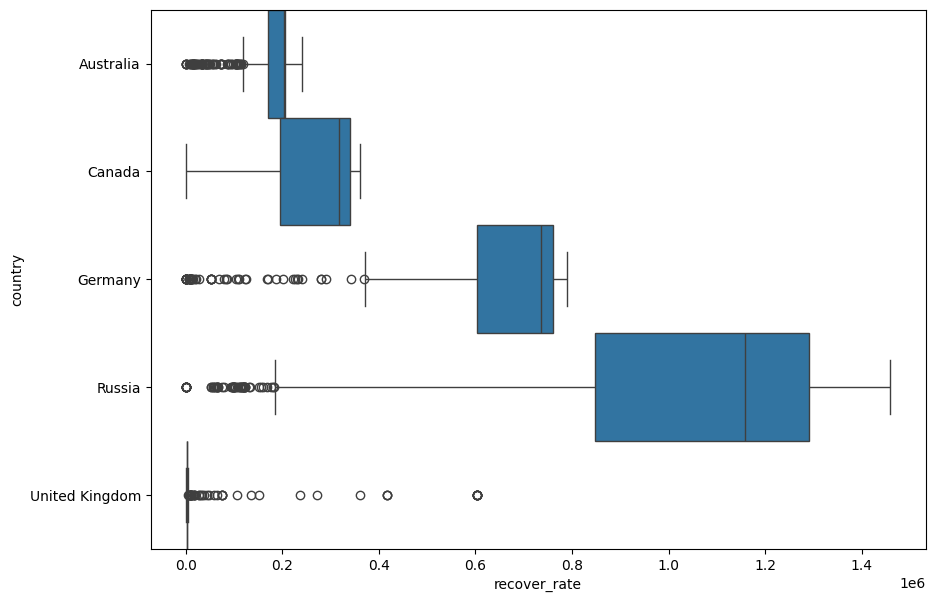

In [63]:
fig2 = plt.figure(figsize=(10, 7))
rec_rate = sns.boxplot(
    data=croped_covid_df,
    x='recover_rate',
    y='country',
    orient='h',
    width=1
    )